# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [4]:
# Set the date column as the DataFrame index
date_ind_df = []
date_ind_df = df.set_index("date")
date_ind_df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [5]:
# Drop the date index column
drop_date_df = []
drop_date_df = date_ind_df.reset_index(drop=True)
drop_date_df.head()

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73


### Compare June and December data across all years 

In [6]:
# Import dependencies
from scipy import stats
from scipy.stats import ttest_ind

In [7]:
# Filter data for the desired months, i.e. June & December
june_df = df[df["date"].dt.month == 6]

In [8]:
# Identify the average temperature for June
june_df_mean = june_df['tobs'].mean()

print(f"\033[94m\033[1mThe average temperature for June is: {round(june_df_mean,5)}\033[0m")

The average temperature for June is: 74.94412


In [9]:
# Filter data for the desired months, i.e. June & December
december_df = df[df["date"].dt.month==12]

In [10]:
# Identify the average temperature for December
december_df_mean = december_df['tobs'].mean()
print(f"\033[94m\033[1mThe average temperature for December is: {round(december_df_mean,5)}\033[0m")

The average temperature for December is: 71.04153


In [11]:
# Run paired t-test
res = stats.ttest_ind(june_df['tobs'], december_df['tobs'], equal_var=False)
print(f"{res}")

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)


In [12]:
print(f"\033[94m\033[1mThe T-Test t-value is: {res[0]}, and p-value is: {res[1]}\033[0m")

The T-Test t-value is: 31.355036920962423, and p-value is: 4.193529835915755e-187


### Analysis

##### Perform data analysis for June & December temperatures

In [13]:
# Create collections of temperature data for June
june_tmp_df = []
june_tmp_df = date_ind_df.reset_index()
june_tmp_df = june_tmp_df[pd.to_datetime(june_tmp_df['date']).dt.month==6].reset_index().dropna()

# Convert dataframe to list for plotting graph
june_tmp_list = june_tmp_df['tobs'].values.tolist()

In [14]:
# Create collections of temperature data for December
december_tmp_df = []
december_tmp_df = date_ind_df.reset_index()
december_tmp_df = december_tmp_df[pd.to_datetime(december_tmp_df['date']).dt.month==12].reset_index().dropna()

# Convert dataframe to list for plotting graph
december_tmp_list = december_tmp_df['tobs'].values.tolist()

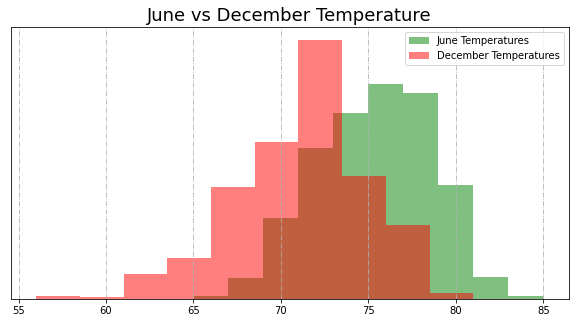

In [15]:
# Plot graph for the collections of temperatures for June and December
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5)) 
ax = plt.subplot(1, 1, 1)

# Plot histograms graph, show legends, title and save to Images folder
plt.hist(june_tmp_list, density=True, alpha=0.5, label="June Temperatures",color='green')
plt.hist(december_tmp_list, density=True, alpha=0.5, label="December Temperatures",color='red')
plt.legend()
plt.title("June vs December Temperature", fontsize=18)
ax.axes.get_yaxis().set_visible(False)
ax.xaxis.grid(True, which='major',linestyle='-.')
plt.savefig("Images/june_vs_december_histplot.png")
plt.show()

In [16]:
# Print statistical data for June & December
j = d = []
j = june_tmp_df.describe()
j = j[['tobs']]
d = december_tmp_df .describe()
d = d[['tobs']]

j = j.rename(columns={"tobs" : "june_tobs"})
d = d.rename(columns={"tobs" : "dec_tobs"})

In [17]:
j_d_concatenate = []
j_d_concatenate = pd.concat([j, d], axis=1)
j_d_concatenate = j_d_concatenate.round(decimals=2).transpose()
j_d_concatenate

,count,mean,std,min,25%,50%,75%,max
june_tobs,1574.0,74.89,3.26,65.0,72.0,75.0,77.0,85.0
dec_tobs,1405.0,70.93,3.74,56.0,69.0,71.0,74.0,81.0


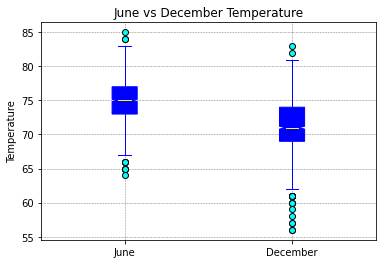

In [18]:
# Plot graph for the collections of temperatures for June and December
x_june = june_df['tobs']
x_dec = december_df['tobs']

fig1, ax1 = plt.subplots()
ax1.boxplot([x_june , x_dec],
            patch_artist=True,
            notch=True,
            whiskerprops=dict(color="blue"),
            medianprops=dict(color="yellow"),
            boxprops=dict(facecolor="blue", color="blue"),
            capprops=dict(color="blue"),
            flierprops=dict(markerfacecolor='cyan', markeredgecolor="black", marker='o')
           )

# Show legends, title and save to Images folder
labels = ["June", "December"]
plt.title("June vs December Temperature")
ax1.set_ylabel('Temperature')

ax1.set_xticklabels(labels)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig("Images/june_vs_december_boxplot.png")
plt.show()

### Conclusion

##### Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
Based on the calculation, the p-value for the ttest is 4.193529835915755e-187 (near zero).

The smaller p-value the higher statically significance. A p-value of less than 0.05 implies significance and that of less than 0.01 implies high significance. 

This p value implies very high statiscally significance and therefore the null hypothesis should be rejected. 

The differences between mean and median (i.e. second quantile) for June and December is quite small, which shows there is no meaningful difference between the temperature in Hawaii for June & December.

##### Will you use a paired t-test, or an unpaired t-test? Why?

Recommend to use unpaired t-test as there are two significant different populations.

The histogram plot for the temperatures recorded in June (denotes in green) tends to have a much more normal, tight bell curve distribution, supported by the smaller standard deviation compares to December (denotes in red) temperatures.

The box plot for the December temperatures seem to be more variable than those in June given its larger range in recorded temperatures.